In [1]:
# Simple implementation of the MobileNet v2.0 using Keras

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import keras
import numpy as np # linear algebra
import keras.backend as K 
import time as ti 
import cv2
import os
import glob # for including images
import scipy.io as sio
from sklearn.metrics import classification_report, confusion_matrix
from keras import layers
from keras import models
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D
from tensorflow.python.keras.layers import Conv2D, DepthwiseConv2D, MaxPooling2D, AveragePooling2D  
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import RMSprop, SGD, Adadelta, Adam 
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.applications import MobileNetV2

Using TensorFlow backend.


In [26]:
import os
import numpy as np
from keras.preprocessing import image

# Define the path to the training directory
train_dir = '/kaggle/input/brain-dead-emotion-detection/brain_dead_emotion_detection/Train/'

# Define the image size for the CNN
img_width, img_height = 32, 32

# Initialize empty lists to store the images and labels
x_train = []
y_train = []

# Loop through the subdirectories of the training directory
for subdir in os.listdir(train_dir):
    
    # Define the path to the subdirectory
    sub_path = os.path.join(train_dir, subdir)
    
    # Loop through the files in the subdirectory
    for file in os.listdir(sub_path):
        
        # Define the path to the file
        file_path = os.path.join(sub_path, file)
        
        # Load the image from the file
        img = image.load_img(file_path, target_size=(img_width, img_height))
        img_array = image.img_to_array(img)
        
        # Add the image and label to the lists
        x_train.append(img_array)
        y_train.append(subdir)
        
# Convert the lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)


In [27]:
print(x_train.shape)

(1810, 32, 32, 3)


In [14]:
print(y_train)

['angry' 'angry' 'angry' ... 'happy' 'happy' 'happy']


In [28]:
# Define the path to the test directory
test_dir = '/kaggle/input/brain-dead-emotion-detection/brain_dead_emotion_detection/Test'

# Define the image size for the CNN
img_width, img_height = 32, 32

# Initialize empty lists to store the images and labels
x_test = []
y_test = []

# Loop through the subdirectories of the test directory
for subdir in os.listdir(test_dir):
    
    # Define the path to the subdirectory
    sub_path = os.path.join(test_dir, subdir)
    
    # Loop through the files in the subdirectory
    for file in os.listdir(sub_path):
        
        # Define the path to the file
        file_path = os.path.join(sub_path, file)
        
        # Load the image from the file
        img = image.load_img(file_path, target_size=(img_width, img_height))
        img_array = image.img_to_array(img)
        
        # Add the image and label to the lists
        x_test.append(img_array)
        y_test.append(subdir)
        
# Convert the lists to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)


In [30]:
print(x_test.shape)

(369, 32, 32, 3)


In [16]:
print(y_test)

['angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry'
 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry'
 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry'
 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry'
 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry'
 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry'
 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry'
 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry'
 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutr

In [17]:
X_train = X_train/255.0
X_test = X_test/255.0

In [18]:
print(y_test)

['angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry'
 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry'
 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry'
 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry'
 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry'
 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry'
 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry'
 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry'
 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutr

In [19]:
# Now we need to have them labeled with numbers from 0 - 120 
label_to_id={v:k for k, v in enumerate(np.unique(y_train))}
#print(label_to_id)

y_train_label_id = np.array([label_to_id[i] for i in y_train])
y_test_label_id = np.array([label_to_id[i] for i in y_test])

# We need to translate this to be "one hot encoded" so our CNN can understand, 
# otherwise it will think this is some sort of regression problem on a continuous axis

from keras.utils.np_utils import to_categorical
print(y_train_label_id.shape)

y_cat_train_label_id=to_categorical(y_train_label_id)
y_cat_test_label_id=to_categorical(y_test_label_id)

(1810,)


In [ ]:
# def build_model():
#     mobilenetv2 = MobileNetV2(input_shape=(32, 32, 3), alpha=1, weights=None, include_top=False,classes=120)

    #Varianta 1
#     model=Sequential(mobilenetv2.layers)
#     model.add(layers.GlobalAveragePooling2D())
#     model.add(layers.Dense(120, activation='softmax'))
    
    # Varianta 2
#     model = Sequential([mobilenetv2,Dense(120, activation='softmax')])
    
    
    # Varianta 3
#     model=Sequential()
#     model.add(mobilenetv2)
#     model.add(layers.GlobalAveragePooling2D())
#     model.add(layers.Dense(120, activation='softmax'))
    
   
#     return model


In [32]:
model = MobileNetV2(input_shape=(32, 32, 3), alpha=1, weights=None,classes=4)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())



Model: "mobilenetv2_1.00_32"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 33, 33, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
________________________________________________________________________________

In [33]:
input_shape=(32,32,3)
epochs=30



filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

result = model.fit(x_train,y_cat_train_label_id,
                       batch_size=15,
                       epochs=30,
                       verbose=1,
                       validation_data=(x_test,y_cat_test_label_id),
                       callbacks=callbacks_list
                      )

Train on 1810 samples, validate on 369 samples
Epoch 1/30
1810/1810 [==============================] - 35s 19ms/step - loss: 1.8688 - accuracy: 0.2807 - val_loss: 1.3862 - val_accuracy: 0.2846

Epoch 00001: val_accuracy improved from -inf to 0.28455, saving model to weights-improvement-01-0.28.hdf5
Epoch 2/30
1810/1810 [==============================] - 17s 9ms/step - loss: 1.4250 - accuracy: 0.3309 - val_loss: 1.3853 - val_accuracy: 0.2846

Epoch 00002: val_accuracy did not improve from 0.28455
Epoch 3/30
1810/1810 [==============================] - 17s 9ms/step - loss: 1.3835 - accuracy: 0.3624 - val_loss: 1.3881 - val_accuracy: 0.2168

Epoch 00003: val_accuracy did not improve from 0.28455
Epoch 4/30
1810/1810 [==============================] - 17s 9ms/step - loss: 1.3531 - accuracy: 0.3878 - val_loss: 1.3830 - val_accuracy: 0.2846

Epoch 00004: val_accuracy did not improve from 0.28455
Epoch 5/30
1810/1810 [==============================] - 17s 9ms/step - loss: 1.3734 - accuracy: 0

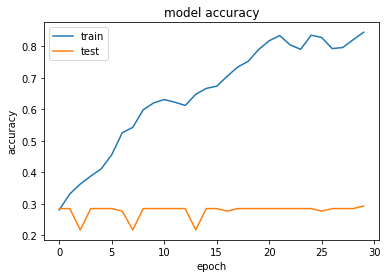

In [34]:
plt.figure(1)  
plt.plot(result.history['accuracy'])  
plt.plot(result.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()



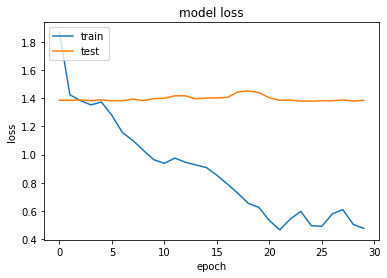

In [35]:
plt.plot(result.history['loss'])  
plt.plot(result.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()



In [40]:
# Load weights
model.load_weights("weights-improvement-30-0.29.hdf5")

# Compile model (required to make predictions)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
print("Created model and loaded weights from file")
model.evaluate(x_test,y_cat_test_label_id)



Created model and loaded weights from file
369/369 [==============================] - 2s 5ms/step


[1.3854791375033577, 0.2926829159259796]

In [ ]:
#model.save("MobileNetV2 - 131 - 2.0.h5")